In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV data
data = pd.read_csv("./datasets_loan.csv")

In [3]:
#preview data
data.dropna(inplace=True)
data = data.iloc[:,1:]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
print(X)
print(y)

[['Male' 'Yes' '1' ... 360.0 1.0 'Rural']
 ['Male' 'Yes' '0' ... 360.0 1.0 'Urban']
 ['Male' 'Yes' '0' ... 360.0 1.0 'Urban']
 ...
 ['Male' 'Yes' '1' ... 360.0 1.0 'Urban']
 ['Male' 'Yes' '2' ... 360.0 1.0 'Urban']
 ['Female' 'No' '0' ... 360.0 0.0 'Semiurban']]
['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y

In [6]:
dataTypeSeries = data.iloc[:,:-1].dtypes
print(dataTypeSeries)
dataTypeDict = dict(dataTypeSeries )
print(dataTypeDict)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
{'Gender': dtype('O'), 'Married': dtype('O'), 'Dependents': dtype('O'), 'Education': dtype('O'), 'Self_Employed': dtype('O'), 'ApplicantIncome': dtype('int64'), 'CoapplicantIncome': dtype('float64'), 'LoanAmount': dtype('float64'), 'Loan_Amount_Term': dtype('float64'), 'Credit_History': dtype('float64'), 'Property_Area': dtype('O')}


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()

XEncoded = X

for col, type in dataTypeDict.items():
    if type == 'O':
        #print(XEncoded[: ,data.columns.get_loc(col)]) 
        colnum = data.columns.get_loc(col)       
        XEncoded[:, colnum] = labelencoder_X.fit_transform(XEncoded[:, colnum])



In [8]:
labelencoder_Y = LabelEncoder()
YEncoded = y
YEncoded = labelencoder_Y.fit_transform(YEncoded)
YEncoded
y= YEncoded
y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [9]:
X = XEncoded
X

array([[1, 1, 1, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 1, ..., 360.0, 1.0, 2],
       [1, 1, 2, ..., 360.0, 1.0, 2],
       [0, 0, 0, ..., 360.0, 0.0, 1]], dtype=object)

In [10]:
#Categorical
#onehotencoder = OneHotEncoder(categorical_features = [1])
#XEncoded = onehotencoder.fit_transform(XEncoded).toarray()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd


#X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [14]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)

In [17]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[19:26:31] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.465778


In [19]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10 ,  'n_estimators': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:26:34] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:34] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:34] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.493066,0.000795,0.494440,0.000494
1,0.484482,0.003422,0.486642,0.004461
2,0.479688,0.002811,0.483423,0.005428
3,0.473054,0.004764,0.477173,0.004468
4,0.467257,0.008466,0.471538,0.005840


In [21]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.411004
Name: test-rmse-mean, dtype: float64


In [22]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:26:36] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:36] WARNING: /workspace/src/learner.cc:328: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




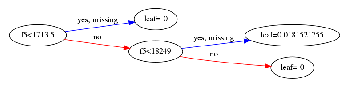

In [23]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

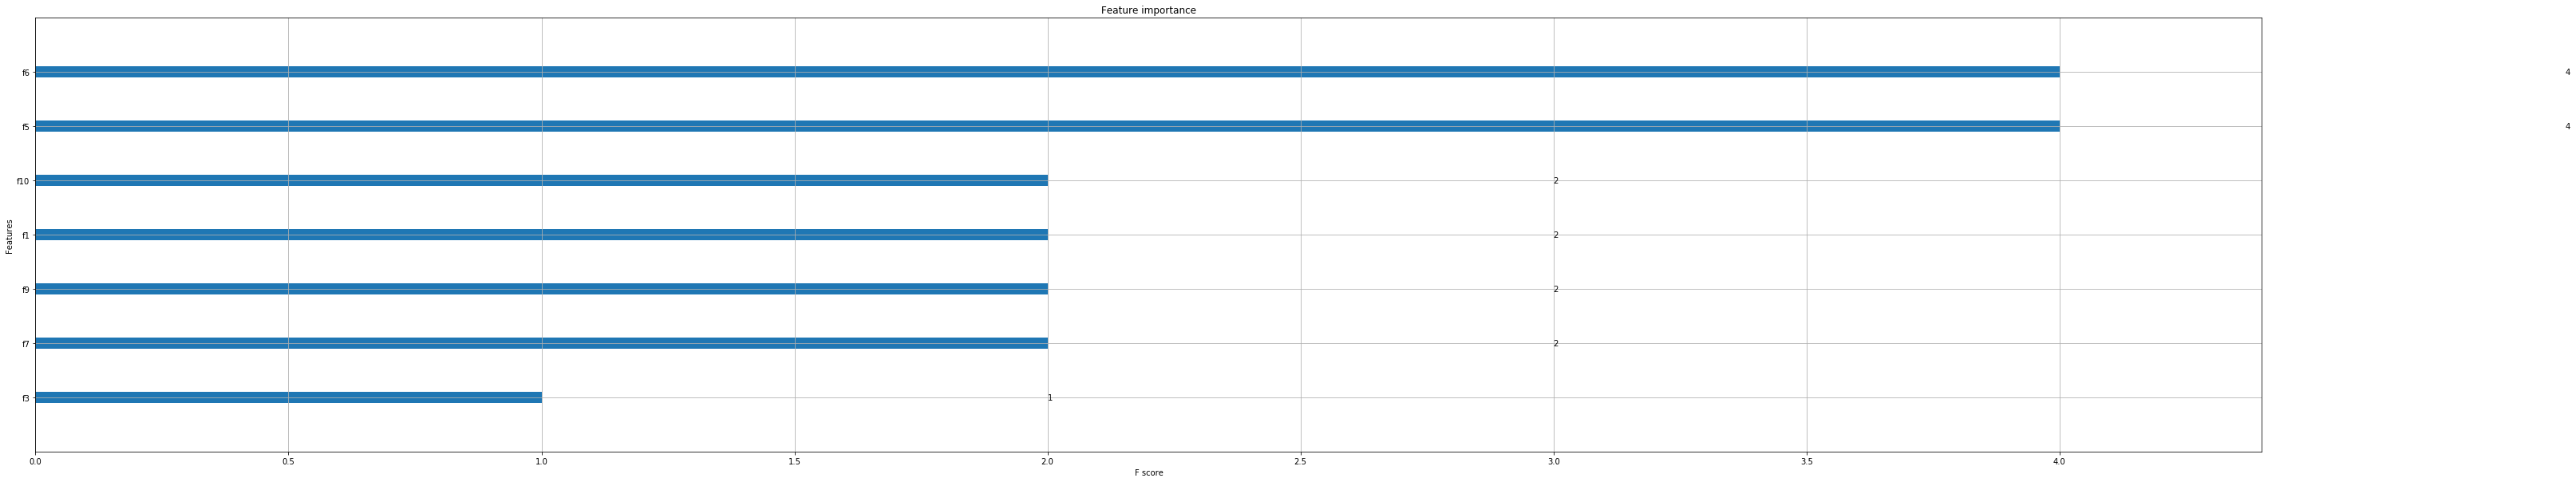

In [24]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50,10]
plt.show()

In [25]:
from xgboost import XGBClassifier
class MyXGBClassifier(XGBClassifier):
    def coef_(self):
        return None

In [28]:

# fit model no training data
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit model no training data
model =MyXGBClassifier()
model.fit(X_train, y_train)

MyXGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints=None,
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=0, num_parallel_tree=1,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
                validate_parameters=False, verbosity=None)

In [29]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [30]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score

# make predictions for test data
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 71.70%


/home/sundeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 79.13% (6.41%)


In [32]:
model.feature_importances_

array([0.04705648, 0.04368431, 0.0579279 , 0.04225515, 0.07543705,
       0.05737174, 0.05352193, 0.0574421 , 0.08343124, 0.4317438 ,
       0.05012826], dtype=float32)

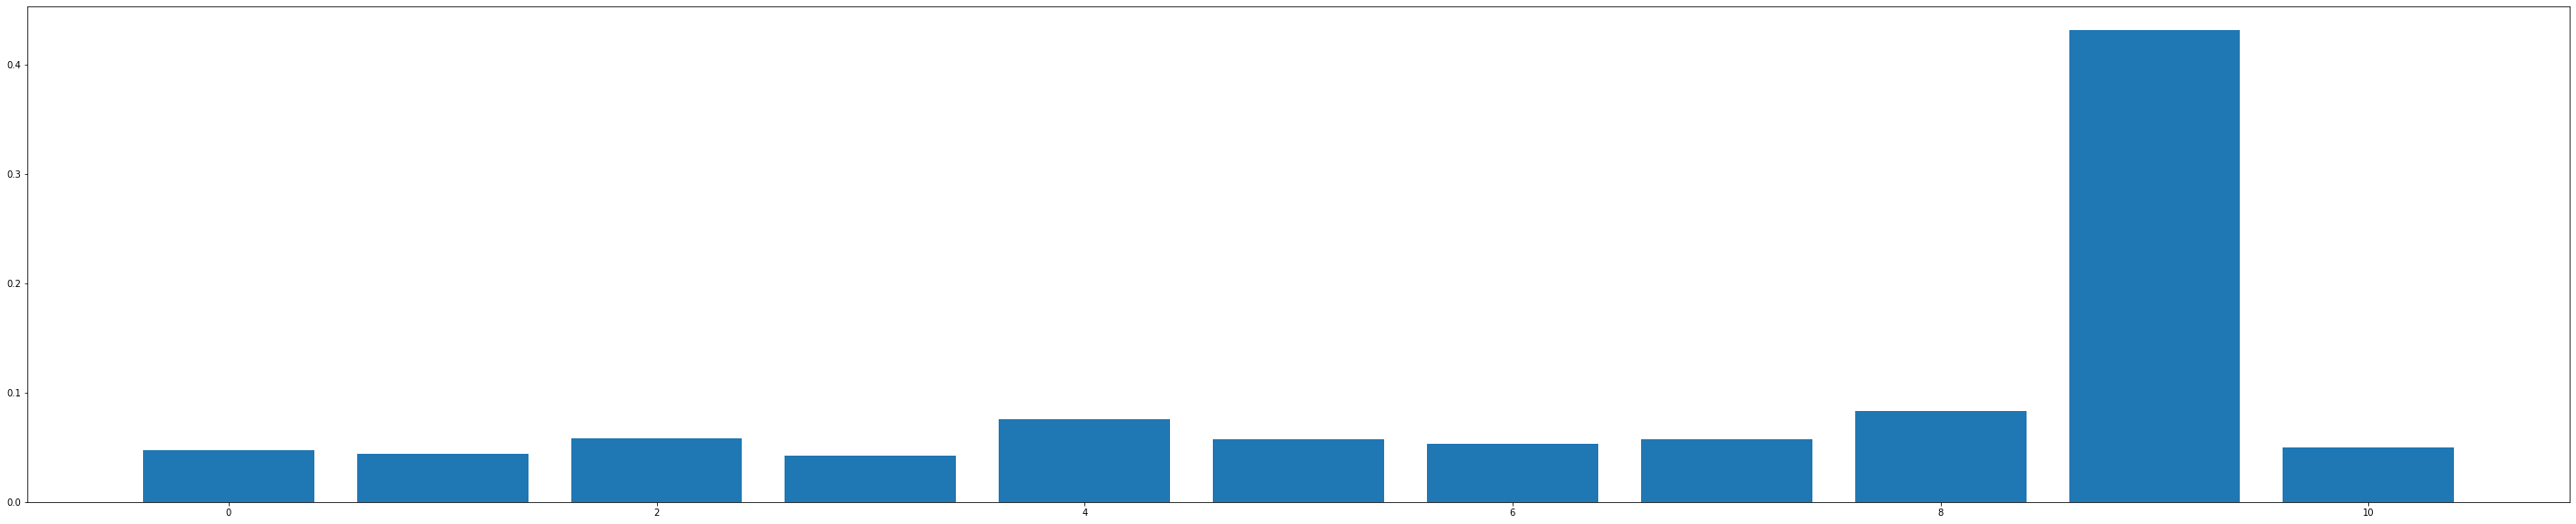

In [33]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [34]:
X_train

array([[1, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 1, ..., 240.0, 1.0, 2],
       [1, 1, 0, ..., 300.0, 1.0, 1],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 1],
       [0, 0, 2, ..., 360.0, 1.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [35]:

from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)
thresholds

[0.042255152,
 0.043684307,
 0.04705648,
 0.050128255,
 0.053521935,
 0.057371743,
 0.057442095,
 0.0579279,
 0.07543705,
 0.08343124,
 0.4317438]

In [36]:

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=0.04225515, prefit=True)
    #print(selection)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = MyXGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.042, n=11, Accuracy: 71.70%
Thresh=0.044, n=11, Accuracy: 71.70%
Thresh=0.047, n=11, Accuracy: 71.70%
Thresh=0.050, n=11, Accuracy: 71.70%
Thresh=0.054, n=11, Accuracy: 71.70%
Thresh=0.057, n=11, Accuracy: 71.70%
Thresh=0.057, n=11, Accuracy: 71.70%
Thresh=0.058, n=11, Accuracy: 71.70%
Thresh=0.075, n=11, Accuracy: 71.70%
Thresh=0.083, n=11, Accuracy: 71.70%
Thresh=0.432, n=11, Accuracy: 71.70%


In [37]:
features = model.get_booster().get_fscore() 


In [38]:
dict_features = {x[0]:x[1] for x in features.items() }
    

In [39]:
dict_features


{'f9': 50,
 'f5': 438,
 'f1': 31,
 'f8': 22,
 'f3': 12,
 'f2': 45,
 'f6': 131,
 'f10': 40,
 'f7': 315,
 'f0': 21,
 'f4': 10}

In [40]:
import operator
sorted_x = sorted(dict_features.items(), key=operator.itemgetter(1), reverse= True)

In [41]:
sorted_x

[('f5', 438),
 ('f7', 315),
 ('f6', 131),
 ('f9', 50),
 ('f2', 45),
 ('f10', 40),
 ('f1', 31),
 ('f8', 22),
 ('f0', 21),
 ('f3', 12),
 ('f4', 10)]

In [42]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
selected_features_by_importance = [data.columns[int(x[0][1:])] for x in sorted_x]

In [44]:
selected_features_by_importance

['ApplicantIncome',
 'LoanAmount',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'Property_Area',
 'Married',
 'Loan_Amount_Term',
 'Gender',
 'Education',
 'Self_Employed']